In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# scaling
from sklearn.preprocessing import StandardScaler

In [2]:
# 데이터 소수점 지정
pd.options.display.precision = 2

# 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'Malgun Gothic'




# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_raw = pd.read_csv('add_variable_customer.csv', encoding='euc-kr')

In [4]:
df_raw.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
df_raw

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,C-10001,여성,37,30,Yes,No,0,Yes,2,Yes,...,3,0,47910,431100,21,83590.48,1755400,2186500,20528,0
1,C-10002,남성,46,40,No,No,0,No,0,No,...,5,11300,12090,108710,21,68928.57,1447500,1567510,5176,538
2,C-10003,남성,50,50,No,No,0,No,0,Yes,...,1,0,38080,152100,4,98180.00,490900,643000,38025,0
3,C-10004,남성,78,70,Yes,No,0,Yes,1,Yes,...,1,0,31410,408720,13,112742.86,1578400,1987120,31440,0
4,C-10005,여성,75,70,Yes,No,0,Yes,3,Yes,...,1,0,8360,24970,3,94500.00,378000,402970,8323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,여성,20,20,No,No,0,No,0,No,...,4,0,52770,685680,25,64428.00,1610700,2296380,27427,0
6859,C-17040,남성,40,40,Yes,No,0,Yes,1,Yes,...,1,0,18310,402730,22,101891.30,2343500,2746230,18305,0
6860,C-17041,남성,22,20,No,No,0,No,0,Yes,...,5,0,21020,42040,14,56600.00,792400,834440,3002,0
6861,C-17042,남성,21,20,No,No,0,Yes,5,No,...,3,0,2370,160460,79,80107.59,6328500,6488960,2031,0


##### @Gender : 여성(1), 남성(0)

In [6]:
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='여성', value=1)
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='남성', value=0)

##### @Married : Yes(1), No(0)

In [7]:
df_raw['Married'] = df_raw['Married'].replace(to_replace='Yes', value=1)
df_raw['Married'] = df_raw['Married'].replace(to_replace='No', value=0)

##### @Referrals : Yes(1), No(0)

In [8]:
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='Yes', value=1)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='No', value=0)

##### @Dependents: Yes(1), No(0)

In [9]:
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='Yes', value=1)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='No', value=0)

##### @PaperlessBilling  : Yes(1), No(0)

In [10]:
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='Yes', value=1)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='No', value=0)

##### @PaymentMethod

In [11]:
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='신용카드', value=1)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='계좌이체', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='이체/메일확인', value=2)

##### @OnlineSecurity

In [12]:
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='Yes', value=1)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='No', value=0)

##### @OnlineBackup  : Yes(1), No(0)

In [13]:
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='Yes', value=1)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='No', value=0)

##### @TechSupport  : Yes(1), No(0)

In [14]:
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='Yes', value=1)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='No', value=0)

##### @UnlimitedData : Yes(1), No(0)

In [15]:
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='Yes', value=1)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='No', value=0)

# DT

In [67]:
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report


In [68]:
df_raw.drop(['CustomerId', 'StartDate', 'EndDate',
             'EndDateTmp', 'ChurnCategory', 'ChurnReason'], axis=1, inplace=True)

KeyError: "['CustomerId', 'StartDate', 'EndDate', 'EndDateTmp', 'ChurnCategory', 'ChurnReason'] not found in axis"

In [ ]:
# df_raw.drop('CustomerLTV', axis=1, inplace=True)

## 데이터 분할

In [69]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop('ChurnLabel', axis=1, inplace=False)
df_raw_y = df_raw['ChurnLabel']


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size=0.35, random_state=42)

In [70]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                6863 non-null   int64  
 1   Age                   6863 non-null   int64  
 2   AgeGroup              6863 non-null   int64  
 3   Married               6863 non-null   int64  
 4   Dependents            6863 non-null   int64  
 5   noDependents          6863 non-null   int64  
 6   Referrals             6863 non-null   int64  
 7   noReferrals           6863 non-null   int64  
 8   PaperlessBilling      6863 non-null   int64  
 9   OnlineSecurity        6863 non-null   int64  
 10  OnlineBackup          6863 non-null   int64  
 11  TechSupport           6863 non-null   int64  
 12  UnlimitedData         6863 non-null   int64  
 13  AvgDownloadGB         6863 non-null   int64  
 14  ChurnLabel            6863 non-null   int64  
 15  ChurnScore           

In [71]:
print('분할 전 설명변수 데이터: ', df_raw_x.shape)
print('분할 후 설명변수 데이터 \ntrain : ', df_train_x.shape, ' test: ', df_test_x.shape)

분할 전 설명변수 데이터:  (6863, 26)
분할 후 설명변수 데이터 
train :  (4460, 26)  test:  (2403, 26)


In [72]:
tree_uncustomized = DecisionTreeClassifier(random_state=42 )
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도å
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.988


In [73]:
v_feature_name = df_train_x.columns

In [74]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_uncustomized.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
16,SatisScore,7.29e-01
20,TenureMonths,1.52e-01
14,ChurnScore,7.10e-02
24,MonthRoamCharge,1.20e-02
18,AvgRoamCharge,7.00e-03
15,CustomerLTV,5.00e-03
13,AvgDownloadGB,4.00e-03
7,noReferrals,4.00e-03
1,Age,4.00e-03
9,OnlineSecurity,4.00e-03


Text(0, 0.5, '설명변수')

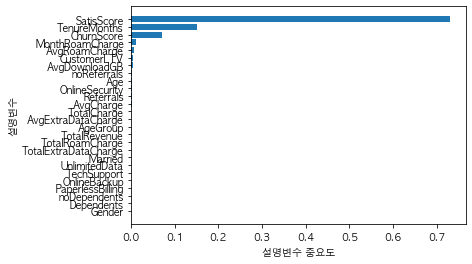

In [75]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [76]:
# 평가
y_pred = tree_uncustomized.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_uncustomized.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.988

Confusion matrix: 
[[1774   16]
 [  13  600]]
              precision    recall  f1-score   support

           0      0.993     0.991     0.992      1790
           1      0.974     0.979     0.976       613

    accuracy                          0.988      2403
   macro avg      0.983     0.985     0.984      2403
weighted avg      0.988     0.988     0.988      2403



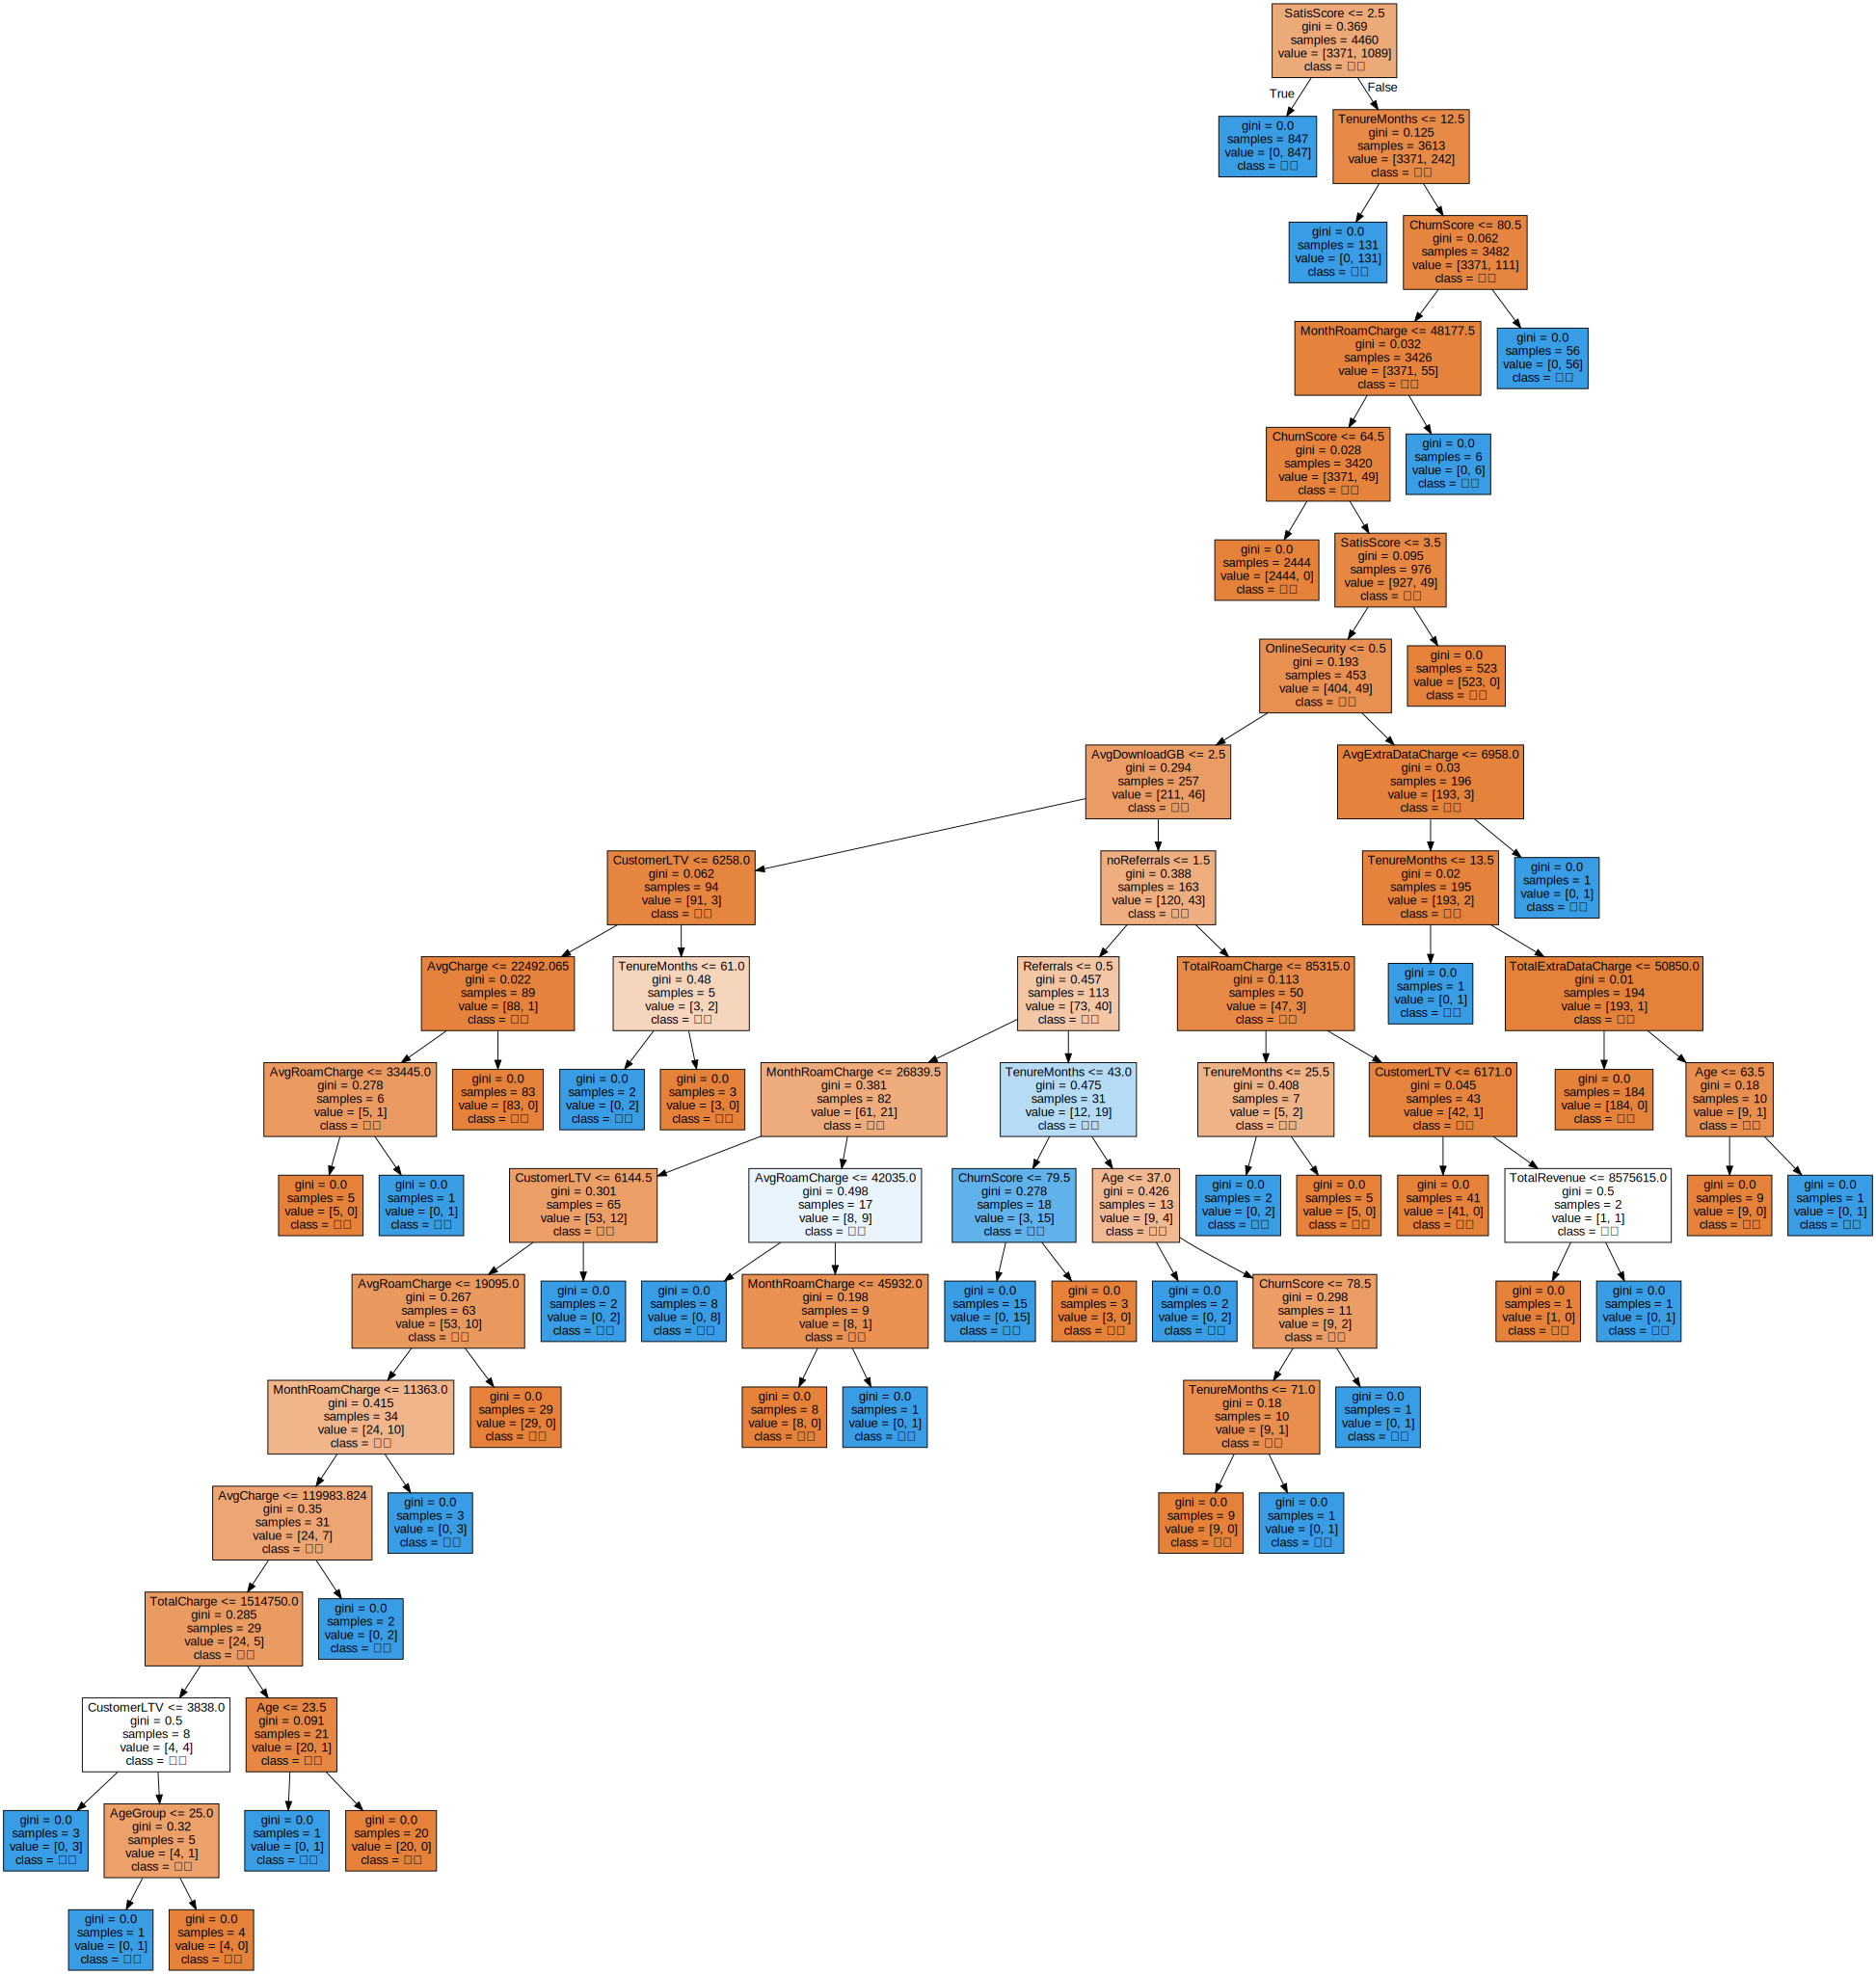

In [77]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_uncustomized, out_file="tree_uncustomized.dot", class_names = ["유지", "이탈"],
# export_graphviz(tree_final, out_file="tree_final.dot", 
                feature_names = v_feature_name, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree_uncustomized.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [28]:
pip install pydot

You should consider upgrading via the '/Users/jay/.pyenv/versions/3.9.9/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [29]:
with open('tree_uncustomized.dot') as file_reader:
    dot_graph = file_reader.read()

dot = graphviz.Source(dot_graph) # dot_graph의 source 저장

dot.render(filename='tree.png') # png로 저장

'tree.png.pdf'

# 로지스틱회귀

In [34]:
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
df_raw[df_raw['ChurnLabel']==0]

,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,OnlineSecurity,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,1,37,30,1,0,0,1,2,1,0,...,3,0,47910,431100,21,83590.48,1755400,2186500,20528,0
1,0,46,40,0,0,0,0,0,0,0,...,5,11300,12090,108710,21,68928.57,1447500,1567510,5176,538
5,1,23,20,0,1,1,0,0,1,0,...,3,0,18980,170520,21,81852.38,1718900,1889420,8120,0
6,1,67,60,1,0,0,1,1,1,1,...,3,0,11300,799140,83,129451.81,10744500,11543640,9628,0
7,0,52,50,1,0,0,1,8,1,1,...,4,22600,14690,922650,75,99408.00,7455600,8400850,12302,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,1,20,20,0,0,0,0,0,1,0,...,3,0,41250,288600,19,105905.26,2012200,2300800,15189,0
6858,1,20,20,0,0,0,0,0,0,1,...,4,0,52770,685680,25,64428.00,1610700,2296380,27427,0
6860,0,22,20,0,0,0,0,0,1,0,...,5,0,21020,42040,14,56600.00,792400,834440,3002,0
6861,0,21,20,0,0,0,1,5,0,1,...,3,0,2370,160460,79,80107.59,6328500,6488960,2031,0


## 로지스틱 회귀모델 및 회귀계수 검토

In [36]:
s_df = df_raw

In [37]:
s_df

,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,OnlineSecurity,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,1,37,30,1,0,0,1,2,1,0,...,3,0,47910,431100,21,83590.48,1755400,2186500,20528,0
1,0,46,40,0,0,0,0,0,0,0,...,5,11300,12090,108710,21,68928.57,1447500,1567510,5176,538
2,0,50,50,0,0,0,0,0,1,0,...,1,0,38080,152100,4,98180.00,490900,643000,38025,0
3,0,78,70,1,0,0,1,1,1,0,...,1,0,31410,408720,13,112742.86,1578400,1987120,31440,0
4,1,75,70,1,0,0,1,3,1,0,...,1,0,8360,24970,3,94500.00,378000,402970,8323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,1,20,20,0,0,0,0,0,0,1,...,4,0,52770,685680,25,64428.00,1610700,2296380,27427,0
6859,0,40,40,1,0,0,1,1,1,0,...,1,0,18310,402730,22,101891.30,2343500,2746230,18305,0
6860,0,22,20,0,0,0,0,0,1,0,...,5,0,21020,42040,14,56600.00,792400,834440,3002,0
6861,0,21,20,0,0,0,1,5,0,1,...,3,0,2370,160460,79,80107.59,6328500,6488960,2031,0


In [38]:
df_pay = df_raw['PaymentMethod']

KeyError: 'PaymentMethod'

In [ ]:
s_df.drop(['CustomerId', 'StartDate', 'EndDate', 'PaymentMethod',
             'EndDateTmp', 'ChurnCategory', 'ChurnReason'], axis=1, inplace=True)

In [20]:
s_df.columns

Index(['Gender', 'Age', 'AgeGroup', 'Married', 'Dependents', 'noDependents',
       'Referrals', 'noReferrals', 'PaperlessBilling', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'UnlimitedData', 'AvgDownloadGB',
       'ChurnLabel', 'ChurnScore', 'CustomerLTV', 'SatisScore',
       'TotalExtraDataCharge', 'AvgRoamCharge', 'TotalRoamCharge',
       'TenureMonths', 'AvgCharge', 'TotalCharge', 'TotalRevenue',
       'MonthRoamCharge', 'AvgExtraDataCharge'],
      dtype='object')

In [21]:
# 변수명 저장
v_feature_names = s_df.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(s_df)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,OnlineSecurity,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,1.01,-0.58,-0.74,1.15,-0.52,-0.47,1.08,3.08e-03,0.83,-0.64,...,-0.23,-0.28,1.26,-0.45,-0.80,0.20,-0.55,-0.58,0.08,-0.15
1,-0.99,-0.04,-0.14,-0.87,-0.52,-0.47,-0.93,-6.58e-01,-1.20,-0.64,...,1.45,0.12,-0.79,-0.79,-0.80,-0.21,-0.66,-0.75,-0.94,0.08
2,-0.99,0.20,0.47,-0.87,-0.52,-0.47,-0.93,-6.58e-01,0.83,-0.64,...,-1.92,-0.28,0.69,-0.75,-1.44,0.61,-0.97,-1.00,1.23,-0.15
3,-0.99,1.89,1.68,1.15,-0.52,-0.47,1.08,-3.28e-01,0.83,-0.64,...,-1.92,-0.28,0.31,-0.48,-1.10,1.02,-0.61,-0.63,0.80,-0.15
4,1.01,1.71,1.68,1.15,-0.52,-0.47,1.08,3.34e-01,0.83,-0.64,...,-1.92,-0.28,-1.01,-0.88,-1.48,0.51,-1.01,-1.06,-0.73,-0.15


In [22]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                6863 non-null   float64
 1   Age                   6863 non-null   float64
 2   AgeGroup              6863 non-null   float64
 3   Married               6863 non-null   float64
 4   Dependents            6863 non-null   float64
 5   noDependents          6863 non-null   float64
 6   Referrals             6863 non-null   float64
 7   noReferrals           6863 non-null   float64
 8   PaperlessBilling      6863 non-null   float64
 9   OnlineSecurity        6863 non-null   float64
 10  OnlineBackup          6863 non-null   float64
 11  TechSupport           6863 non-null   float64
 12  UnlimitedData         6863 non-null   float64
 13  AvgDownloadGB         6863 non-null   float64
 14  ChurnLabel            6863 non-null   float64
 15  ChurnScore           

In [23]:
df_y = df_raw['ChurnLabel']

In [39]:
ss_df = pd.concat([df_y, df_scaled, df_pay], axis=1)
ss_df

,ChurnLabel,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge,PaymentMethod
0,0,1.01,-0.58,-0.74,1.15,-0.52,-0.47,1.08,3.08e-03,0.83,...,-0.28,1.26,-0.45,-0.80,0.20,-0.55,-0.58,0.08,-0.15,1
1,0,-0.99,-0.04,-0.14,-0.87,-0.52,-0.47,-0.93,-6.58e-01,-1.20,...,0.12,-0.79,-0.79,-0.80,-0.21,-0.66,-0.75,-0.94,0.08,1
2,1,-0.99,0.20,0.47,-0.87,-0.52,-0.47,-0.93,-6.58e-01,0.83,...,-0.28,0.69,-0.75,-1.44,0.61,-0.97,-1.00,1.23,-0.15,0
3,1,-0.99,1.89,1.68,1.15,-0.52,-0.47,1.08,-3.28e-01,0.83,...,-0.28,0.31,-0.48,-1.10,1.02,-0.61,-0.63,0.80,-0.15,0
4,1,1.01,1.71,1.68,1.15,-0.52,-0.47,1.08,3.34e-01,0.83,...,-0.28,-1.01,-0.88,-1.48,0.51,-1.01,-1.06,-0.73,-0.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,0,1.01,-1.60,-1.35,-0.87,-0.52,-0.47,-0.93,-6.58e-01,-1.20,...,-0.28,1.53,-0.19,-0.65,-0.34,-0.60,-0.55,0.53,-0.15,1
6859,1,-0.99,-0.40,-0.14,1.15,-0.52,-0.47,1.08,-3.28e-01,0.83,...,-0.28,-0.44,-0.48,-0.76,0.72,-0.36,-0.42,-0.07,-0.15,0
6860,0,-0.99,-1.48,-1.35,-0.87,-0.52,-0.47,-0.93,-6.58e-01,0.83,...,-0.28,-0.28,-0.86,-1.07,-0.56,-0.87,-0.95,-1.08,-0.15,1
6861,0,-0.99,-1.54,-1.35,-0.87,-0.52,-0.47,1.08,9.95e-01,-1.20,...,-0.28,-1.35,-0.74,1.39,0.10,0.97,0.60,-1.14,-0.15,1


In [40]:
ss_df.columns

Index(['ChurnLabel', 'Gender', 'Age', 'AgeGroup', 'Married', 'Dependents',
       'noDependents', 'Referrals', 'noReferrals', 'PaperlessBilling',
       'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'UnlimitedData',
       'AvgDownloadGB', 'ChurnLabel', 'ChurnScore', 'CustomerLTV',
       'SatisScore', 'TotalExtraDataCharge', 'AvgRoamCharge',
       'TotalRoamCharge', 'TenureMonths', 'AvgCharge', 'TotalCharge',
       'TotalRevenue', 'MonthRoamCharge', 'AvgExtraDataCharge',
       'PaymentMethod'],
      dtype='object')

In [26]:
ss_df.to_csv('ss_SCALE.csv')

In [27]:
df = pd.read_csv('ss_SCALE.csv', encoding='euc-kr')

In [28]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
df['PaymentMethod']

0       1
1       1
2       0
3       0
4       1
       ..
6858    1
6859    0
6860    1
6861    1
6862    0
Name: PaymentMethod, Length: 6863, dtype: int64

In [42]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     random_state = 42)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (4804, 29)
test data size : (2059, 29)


In [43]:
df_train

,ChurnLabel,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge,PaymentMethod
4899,1,1.01,1.71,1.68,-0.87,-0.52,-0.47,-0.93,-0.66,0.83,...,-0.28,1.22,-0.76,-1.48,0.34,-1.02,-1.04,1.85,-0.15,0
4074,0,1.01,0.02,-0.14,1.15,-0.52,-0.47,1.08,2.32,-1.20,...,-0.28,0.14,0.54,0.71,0.21,0.56,0.60,0.22,-0.15,0
1112,0,1.01,0.45,0.47,-0.87,-0.52,-0.47,-0.93,-0.66,0.83,...,-0.28,-1.30,-0.77,0.37,0.92,0.75,0.41,-1.12,-0.15,0
776,0,1.01,1.11,1.08,1.15,-0.52,-0.47,1.08,1.66,0.83,...,-0.28,1.74,3.03,1.39,-1.48,-0.51,0.37,1.88,-0.15,0
6484,0,-0.99,1.35,1.08,1.15,-0.52,-0.47,1.08,2.65,0.83,...,-0.28,-0.75,0.04,1.54,0.16,1.13,0.94,-0.55,-0.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,-0.99,-0.76,-0.74,1.15,-0.52,-0.47,1.08,-0.33,-1.20,...,-0.28,0.32,-0.28,-0.88,1.25,-0.33,-0.35,0.81,-0.15,0
5191,1,1.01,-1.24,-1.35,-0.87,-0.52,-0.47,-0.93,-0.66,0.83,...,-0.28,-0.34,-0.11,-0.16,0.67,0.16,0.10,0.04,-0.15,1
5226,0,-0.99,0.14,-0.14,-0.87,-0.52,-0.47,-0.93,-0.66,0.83,...,-0.28,-0.41,-0.88,-1.10,0.74,-0.69,-0.80,-1.18,-0.15,0
5390,0,1.01,-0.76,-0.74,-0.87,-0.52,-0.47,-0.93,-0.66,-1.20,...,-0.28,0.68,-0.59,-0.84,0.02,-0.62,-0.67,-0.28,-0.15,0


## 로지스틱 회귀모델 및 회귀계수 검토

In [153]:
df

,ChurnLabel,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,0,1.01,-0.58,-0.74,1.15,-0.52,-0.47,1.08,3.08e-03,0.83,...,-0.23,-0.28,1.26,-0.45,-0.80,0.20,-0.55,-0.58,0.08,-0.15
1,0,-0.99,-0.04,-0.14,-0.87,-0.52,-0.47,-0.93,-6.58e-01,-1.20,...,1.45,0.12,-0.79,-0.79,-0.80,-0.21,-0.66,-0.75,-0.94,0.08
2,1,-0.99,0.20,0.47,-0.87,-0.52,-0.47,-0.93,-6.58e-01,0.83,...,-1.92,-0.28,0.69,-0.75,-1.44,0.61,-0.97,-1.00,1.23,-0.15
3,1,-0.99,1.89,1.68,1.15,-0.52,-0.47,1.08,-3.28e-01,0.83,...,-1.92,-0.28,0.31,-0.48,-1.10,1.02,-0.61,-0.63,0.80,-0.15
4,1,1.01,1.71,1.68,1.15,-0.52,-0.47,1.08,3.34e-01,0.83,...,-1.92,-0.28,-1.01,-0.88,-1.48,0.51,-1.01,-1.06,-0.73,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,0,1.01,-1.60,-1.35,-0.87,-0.52,-0.47,-0.93,-6.58e-01,-1.20,...,0.61,-0.28,1.53,-0.19,-0.65,-0.34,-0.60,-0.55,0.53,-0.15
6859,1,-0.99,-0.40,-0.14,1.15,-0.52,-0.47,1.08,-3.28e-01,0.83,...,-1.92,-0.28,-0.44,-0.48,-0.76,0.72,-0.36,-0.42,-0.07,-0.15
6860,0,-0.99,-1.48,-1.35,-0.87,-0.52,-0.47,-0.93,-6.58e-01,0.83,...,1.45,-0.28,-0.28,-0.86,-1.07,-0.56,-0.87,-0.95,-1.08,-0.15
6861,0,-0.99,-1.54,-1.35,-0.87,-0.52,-0.47,1.08,9.95e-01,-1.20,...,-0.23,-0.28,-1.35,-0.74,1.39,0.10,0.97,0.60,-1.14,-0.15


In [154]:
df.columns

Index(['ChurnLabel', 'Gender', 'Age', 'AgeGroup', 'Married', 'Dependents',
       'noDependents', 'Referrals', 'noReferrals', 'PaperlessBilling',
       'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'UnlimitedData', 'AvgDownloadGB', 'ChurnLabel.1', 'ChurnScore',
       'CustomerLTV', 'SatisScore', 'TotalExtraDataCharge', 'AvgRoamCharge',
       'TotalRoamCharge', 'TenureMonths', 'AvgCharge', 'TotalCharge',
       'TotalRevenue', 'MonthRoamCharge', 'AvgExtraDataCharge'],
      dtype='object')

In [59]:
# from_formula 함수를 이용하여 변수 역할 지정
# 분석 대상 이벤트=“1”
log_model = Logit.from_formula('''ChurnLabel ~ Gender + Age + \n
                                + UnlimitedData + AvgDownloadGB + ChurnScore + CustomerLTV + SatisScore + TotalExtraDataCharge \n
                                + AvgRoamCharge + TotalRoamCharge + TenureMonths + AvgCharge + TotalCharge + TotalRevenue + MonthRoamCharge + AvgExtraDataCharge''', df_train)
# 적합
log_result = log_model.fit(maxiter=1000, method='bfgs')

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.004188
         Iterations: 194
         Function evaluations: 196
         Gradient evaluations: 196
                           Logit Regression Results                           
Dep. Variable:             ChurnLabel   No. Observations:                 4804
Model:                          Logit   Df Residuals:                     4788
Method:                           MLE   Df Model:                           15
Date:                Wed, 16 Mar 2022   Pseudo R-squ.:                  0.9925
Time:                        10:44:11   Log-Likelihood:                -20.118
converged:                       True   LL-Null:                       -2675.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept      

/Users/jay/.pyenv/versions/3.9.9/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


## XGBoosting

In [78]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 평가 함수
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [79]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier()

xgboost_uncust

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [80]:
# 모델 적합
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(df_train_x)
# 모델 평가
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(df_test_x)
# 모델 평가
eval_class_model(df_test_y, xgb_pred_test)

[11:01:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 모델 생성 및 평가 : Train 

오차행렬:
 [[3371    0]
 [   0 1089]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[1787    3]
 [  10  603]] 

정확도: 0.9946
정밀도: 0.9950
재현율: 0.9837
F1    : 0.9893
AUC   : 0.9910


In [9]:
df_raw[(df_raw['SatisScore'] >= 3) & (df_raw['ChurnScore'] >= 65) & (df_raw['ChurnScore'] <=80)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,C-10001,여성,37,30,Yes,No,0,Yes,2,Yes,...,3,0,47910,431100,21,83590.48,1755400,2186500,20528,0
1,C-10002,남성,46,40,No,No,0,No,0,No,...,5,11300,12090,108710,21,68928.57,1447500,1567510,5176,538
22,C-10023,여성,30,30,Yes,Yes,2,Yes,1,Yes,...,4,0,39440,907280,35,96962.86,3393700,4300980,25922,0
25,C-10027,여성,37,30,Yes,Yes,3,Yes,10,Yes,...,3,22600,39550,2177740,67,121605.97,8147600,10347940,32503,337
28,C-10030,여성,47,40,Yes,Yes,3,Yes,5,No,...,5,0,43390,2993260,81,23365.43,1892600,4885860,36953,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846,C-17027,여성,50,50,No,No,0,No,0,No,...,5,0,35030,210290,18,22750.00,409500,619790,11682,0
6849,C-17030,여성,55,50,No,No,0,No,0,No,...,5,0,28930,809650,40,62680.00,2507200,3316850,20241,0
6850,C-17031,여성,77,70,Yes,No,0,Yes,1,Yes,...,3,0,53790,2853140,65,109116.92,7092600,9945740,43894,0
6853,C-17034,남성,24,20,No,No,0,No,0,No,...,4,0,55940,55940,13,22930.77,298100,354040,4303,0
